In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [3]:
#read the train and test datasets

df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

print(df_train.shape)
print(df_test.shape)

df_train.head()

(1460, 81)
(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
#checking the columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# cat_features = [x for x  in df_train.columns if df_train[x].dtypes == "object"]
# num_features = [x for x in df_train.columns if df_train[x].dtypes != "object"]


cat_features = list(df_train.dtypes[df_train.dtypes == "object"].index)
num_features = list(df_train.dtypes[df_train.dtypes != "object"].index)

print(cat_features)
print(len(cat_features))
print(num_features)
print(len(num_features))
    

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

### Analysing the target variable

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

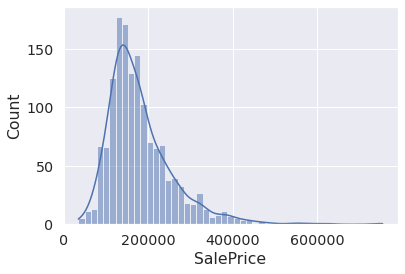

In [9]:
# draw a histogram of target variable

# sns.displot(df_train["SalePrice"],kind='kde')
# sns.distplot(df_train["SalePrice"],fit=norm)
sns.histplot(df_train["SalePrice"],kde=True)
# sns.histplot(df_train["SalePrice"],kde=True,log_scale=True)

The distribution looks right skewed.

In [10]:
print("Skewness: ", df_train["SalePrice"].skew())
print("Kurtosis: ", df_train["SalePrice"].kurtosis())


Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


The positive value of skewness shows it is skewed right
The kurtosis > 3 indicates the distribution has a sharper peak than a normal distribution (leptokurtic) 
The kurtosis < 3 indicates the distribution has a flatter peak (and thicker tails) than a normal distribution. (platykurtic)

### Correlation with other features

<AxesSubplot:>

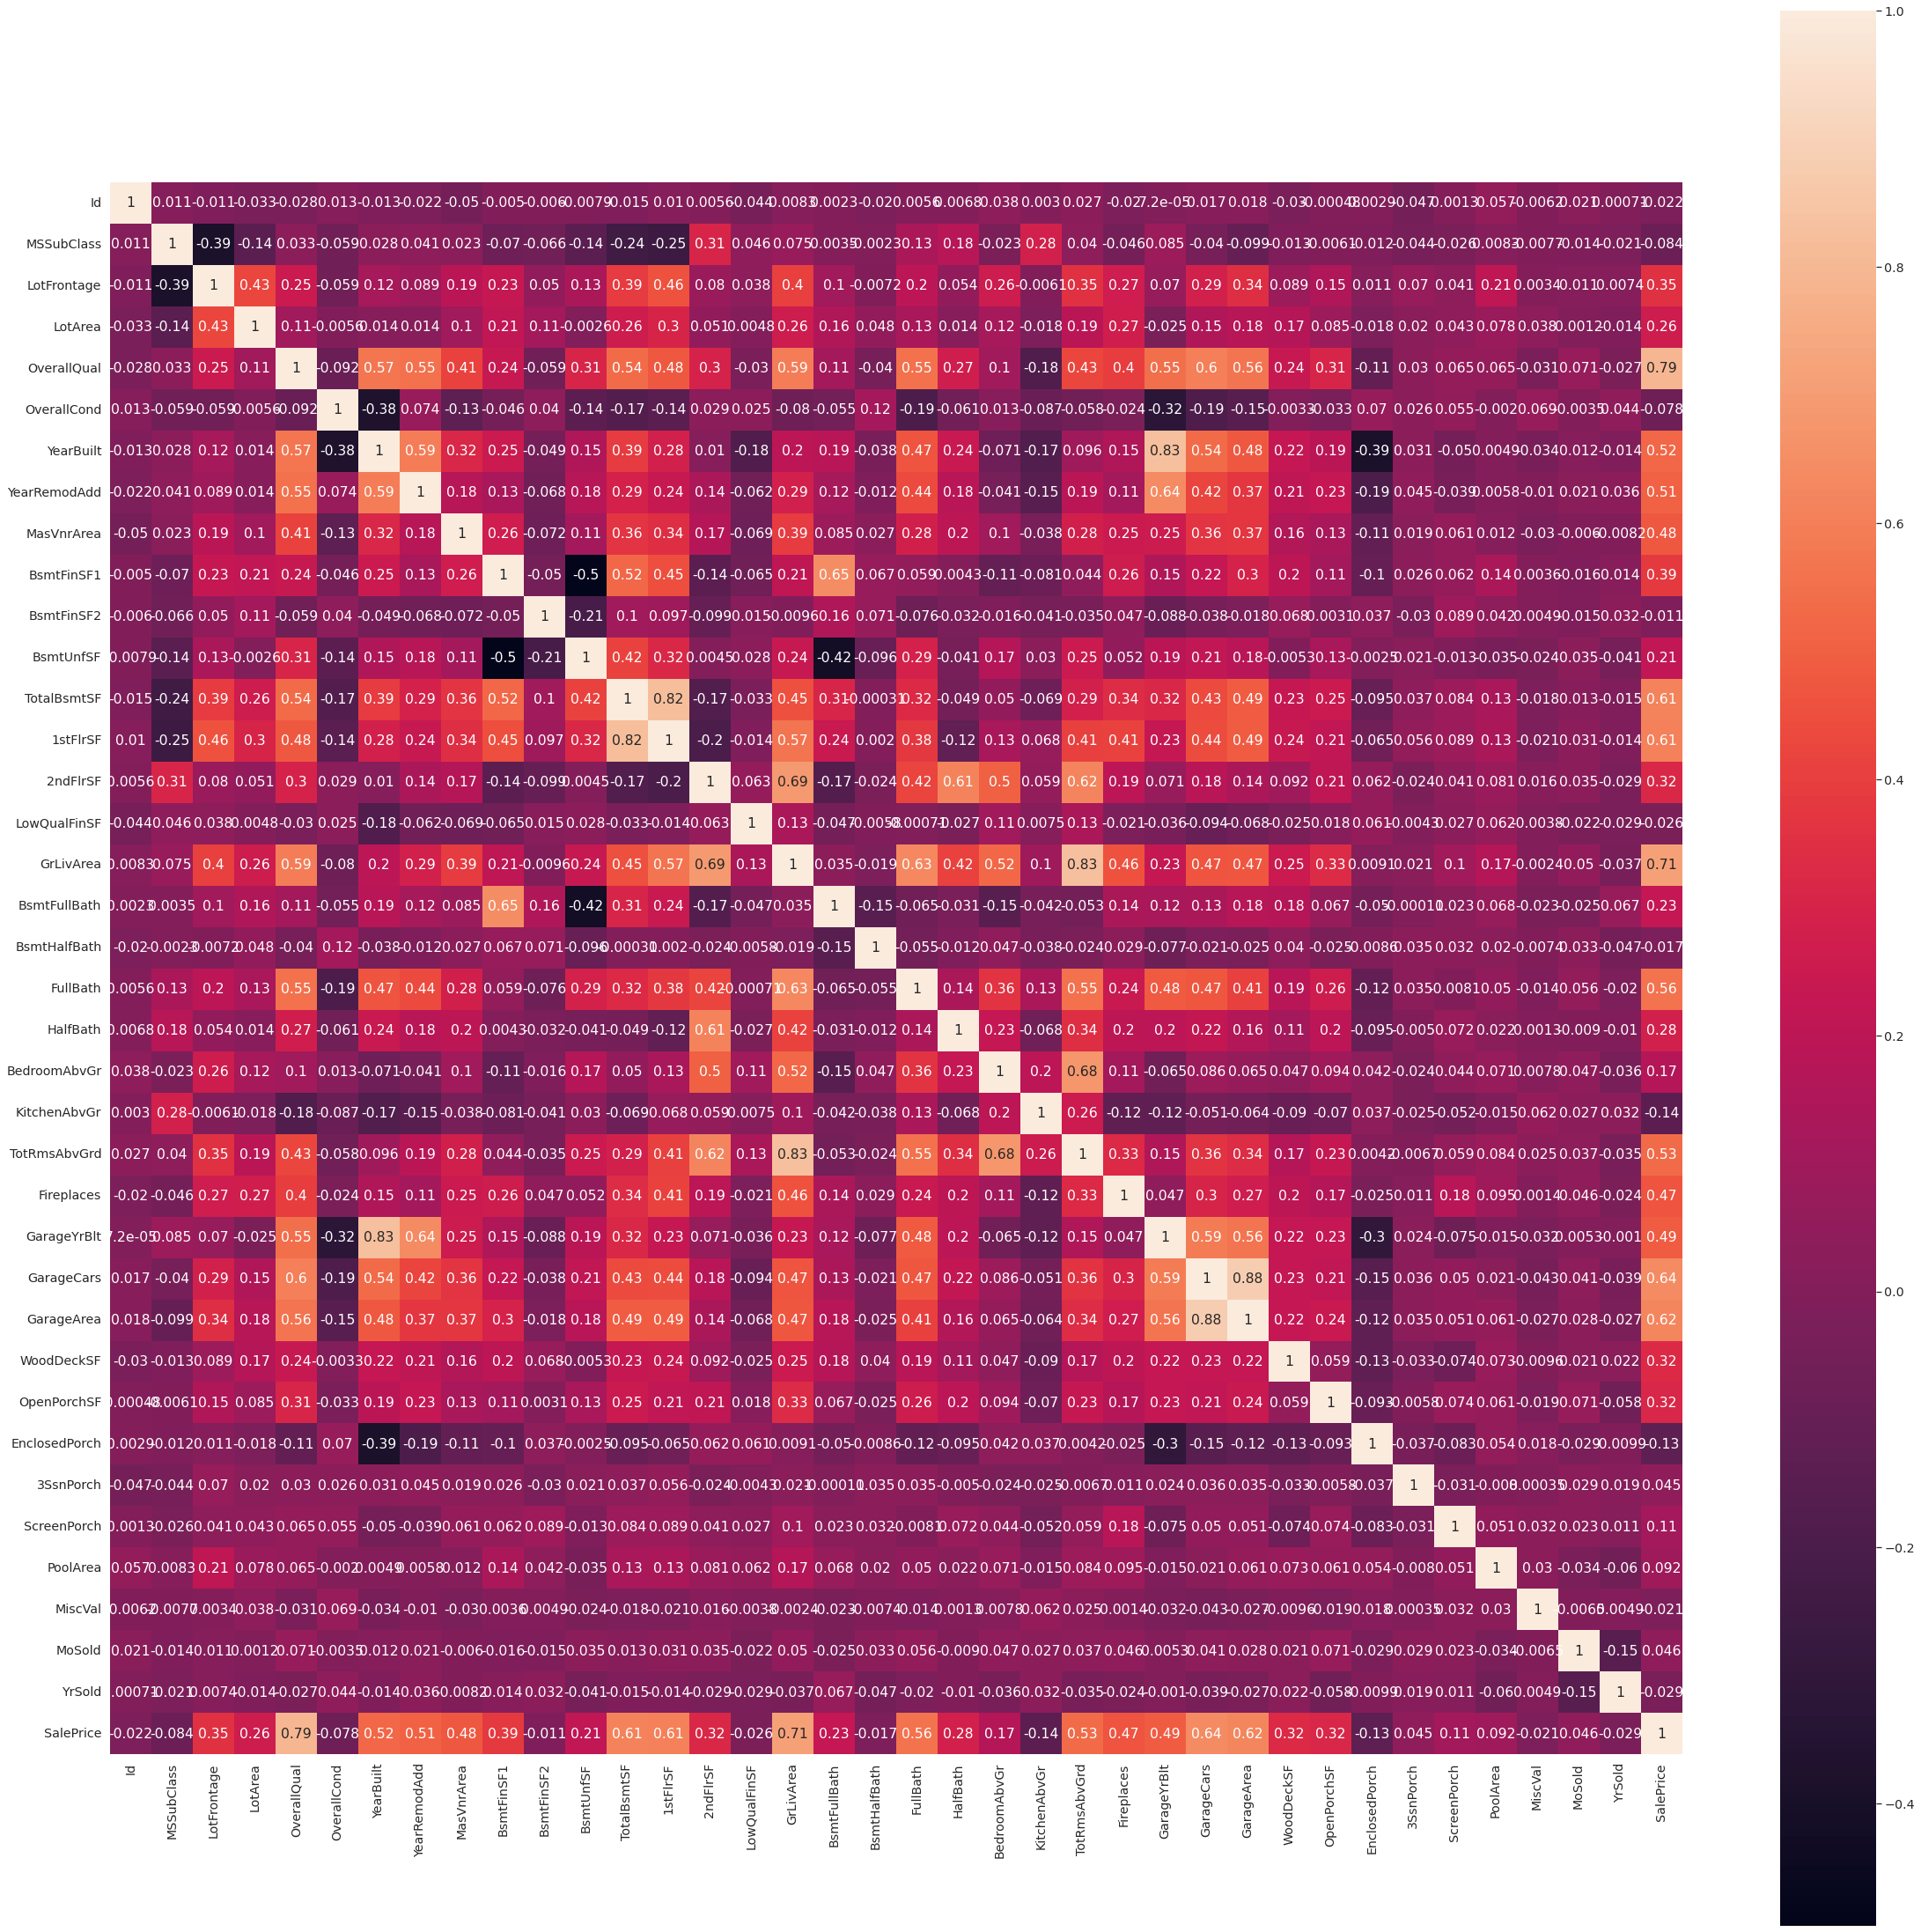

In [11]:
plt.figure(figsize=(40,40))
corr = df_train.corr()
sns.heatmap(corr,annot=True,square=True)

In [12]:
corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [13]:
# selecting the higher correlated features for more analysis

corr["SalePrice"][(corr["SalePrice"]>.2) | (corr["SalePrice"]< -0.2)]

LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [14]:
sel_num_features = corr["SalePrice"][(corr["SalePrice"]>.2) | (corr["SalePrice"]< -0.2)].index

print(sel_num_features)
print(sel_num_features.size)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')
23


### Handling Missing data

In [15]:
# df_train.isnull()[df_train.isnull()>0].sum().sort_values(ascending=False)

miss_cnt = df_train.isnull().sum().sort_values(ascending=False)

miss_per = ((df_train.isnull().sum()*100)/df_train.isnull().count()).sort_values(ascending=False)

df_miss = pd.concat([miss_cnt,miss_per],axis='columns',keys=('Count','Percent'))

df_miss[df_miss["Count"]>0]



Count    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493

In [16]:
# We can remove the columns with more than 30% missing data

miss_cols = df_miss[df_miss["Percent"] > 30].index

print(miss_cols)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')


In [17]:
df_train.drop(miss_cols,axis='columns',inplace=True)
df_test.drop(miss_cols,axis='columns',inplace=True)


print(df_train.shape)
print(df_test.shape)

(1460, 76)
(1459, 75)


In [18]:
#repopulate the feature list after dropping the missing data columns

cat_features = list(df_train.dtypes[df_train.dtypes == "object"].index)
num_features = list(df_train.dtypes[df_train.dtypes != "object"].index)

print(cat_features)
print(len(cat_features))
print(num_features)
print(len(num_features))
    

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',

In [19]:
#these are the columns with missing values that need to be handled.

df_train[df_miss[(df_miss["Percent"] < 30) & (df_miss["Percent"] > 0)].index].head(30)

LotFrontage  GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
0          65.0       2003.0         TA     Attchd          RFn         TA   
1          80.0       1976.0         TA     Attchd          RFn         TA   
2          68.0       2001.0         TA     Attchd          RFn         TA   
3          60.0       1998.0         TA     Detchd          Unf         TA   
4          84.0       2000.0         TA     Attchd          RFn         TA   
5          85.0       1993.0         TA     Attchd          Unf         TA   
6          75.0       2004.0         TA     Attchd          RFn         TA   
7           NaN       1973.0         TA     Attchd          RFn         TA   
8          51.0       1931.0         TA     Detchd          Unf         Fa   
9          50.0       1939.0         TA     Attchd          RFn         Gd   
10         70.0       1965.0         TA     Detchd          Unf         TA   
11         85.0       2005.0         TA    BuiltIn          Fin         TA   
12          NaN       1962.0         TA     Detchd          Unf         TA   
13         91.0       2006.0         TA     Attchd          RFn         TA   
14          NaN       1960.0         TA     Attchd          RFn         TA   
15         51.0       1991.0         TA     Detchd          Unf         TA   
16          NaN       1970.0         TA     Attchd          Fin         TA   
17         72.0       1967.0         TA    CarPort          Unf         TA   
18         66.0       2004.0         TA     Detchd          Unf         TA   
19         70.0       1958.0         TA     Attchd          Unf         TA   
20        101.0       2005.0         TA    BuiltIn          RFn         TA   
21         57.0       1930.0         TA     Attchd          Unf         TA   
22         75.0       2002.0         TA     Attchd          RFn         TA   
23         44.0       1976.0         TA     Attchd          Unf         TA   
24          NaN       1968.0         TA     Attchd          Unf         TA   
25        110.0       2007.0         TA     Attchd          RFn         TA   
26         60.0       2005.0         TA     Detchd          Unf         TA   
27         98.0       2008.0         TA     Attchd          RFn         TA   
28         47.0       1957.0         TA     Attchd          RFn         TA   
29         60.0       1920.0         TA     Detchd          Unf         Fa   

   BsmtFinType2 BsmtExposure BsmtQual BsmtCond BsmtFinType1  MasVnrArea  \
0           Unf           No       Gd       TA          GLQ       196.0   
1           Unf           Gd       Gd       TA          ALQ         0.0   
2           Unf           Mn       Gd       TA          GLQ       162.0   
3           Unf           No       TA       Gd          ALQ         0.0   
4           Unf           Av       Gd       TA          GLQ       350.0   
5           Unf           No       Gd       TA          GLQ         0.0   
6           Unf           Av       Ex       TA          GLQ       186.0   
7           BLQ           Mn       Gd       TA          ALQ       240.0   
8           Unf           No       TA       TA          Unf         0.0   
9           Unf           No       TA       TA          GLQ         0.0   
10          Unf           No       TA       TA          Rec         0.0   
11          Unf           No       Ex       TA          GLQ       286.0   
12          Unf           No       TA       TA          ALQ         0.0   
13          Unf           Av       Gd       TA          Unf       306.0   
14          Unf           No       TA       TA          BLQ       212.0   
15          Unf           No       TA       TA          Unf         0.0   
16          Unf           No       TA       TA          ALQ       180.0   
17          NaN          NaN      NaN      NaN          NaN         0.0   
18          Unf           No       TA       TA          GLQ         0.0   
19          Unf           No       TA       TA          LwQ         0.0   
20        

In [20]:
#grouping by neighbourhood and taking the median for LotFrontage

df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))


In [21]:
#replace GarageCond,GarageType,GarageFinish,GarageQual with 'None' GarageYrBlt with zero

for cols in ['GarageCond','GarageType','GarageFinish','GarageQual']:
    df_train[cols] = df_train[cols].fillna("None")
    df_test[cols] = df_test[cols].fillna("None")
    
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)

In [22]:
#replace BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1 with None

for cols in ["BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond","BsmtFinType1"]:
    df_train[cols] = df_train[cols].fillna("None")
    df_test[cols] = df_test[cols].fillna("None")

df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])

df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["Electrical"] = df_test["Electrical"].fillna(df_test["Electrical"].mode()[0])

In [23]:
#check if any missing value left
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [24]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [25]:
df_test = df_test.fillna(0)

In [26]:
print(df_test.shape)
print(df_train.shape)

(1459, 75)
(1460, 76)


In [27]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

Series([], dtype: int64)

### Distribution of Numerical features

In [28]:
#Separating the discrete and continuous features

#Consider a feature as discrete if the number of unique values is less than 20

sel_num_dis_features =[x for x in sel_num_features if len(df_train[x].unique()) < 20]

print(sel_num_dis_features)
print(len(sel_num_dis_features))

sel_num_cont_features = list(set(sel_num_features) - set(sel_num_dis_features))

print(sel_num_cont_features)
print(len(sel_num_cont_features))


['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
7
['SalePrice', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt', 'OpenPorchSF', 'BsmtUnfSF', 'LotArea', 'LotFrontage', 'WoodDeckSF', 'BsmtFinSF1', 'MasVnrArea']
16


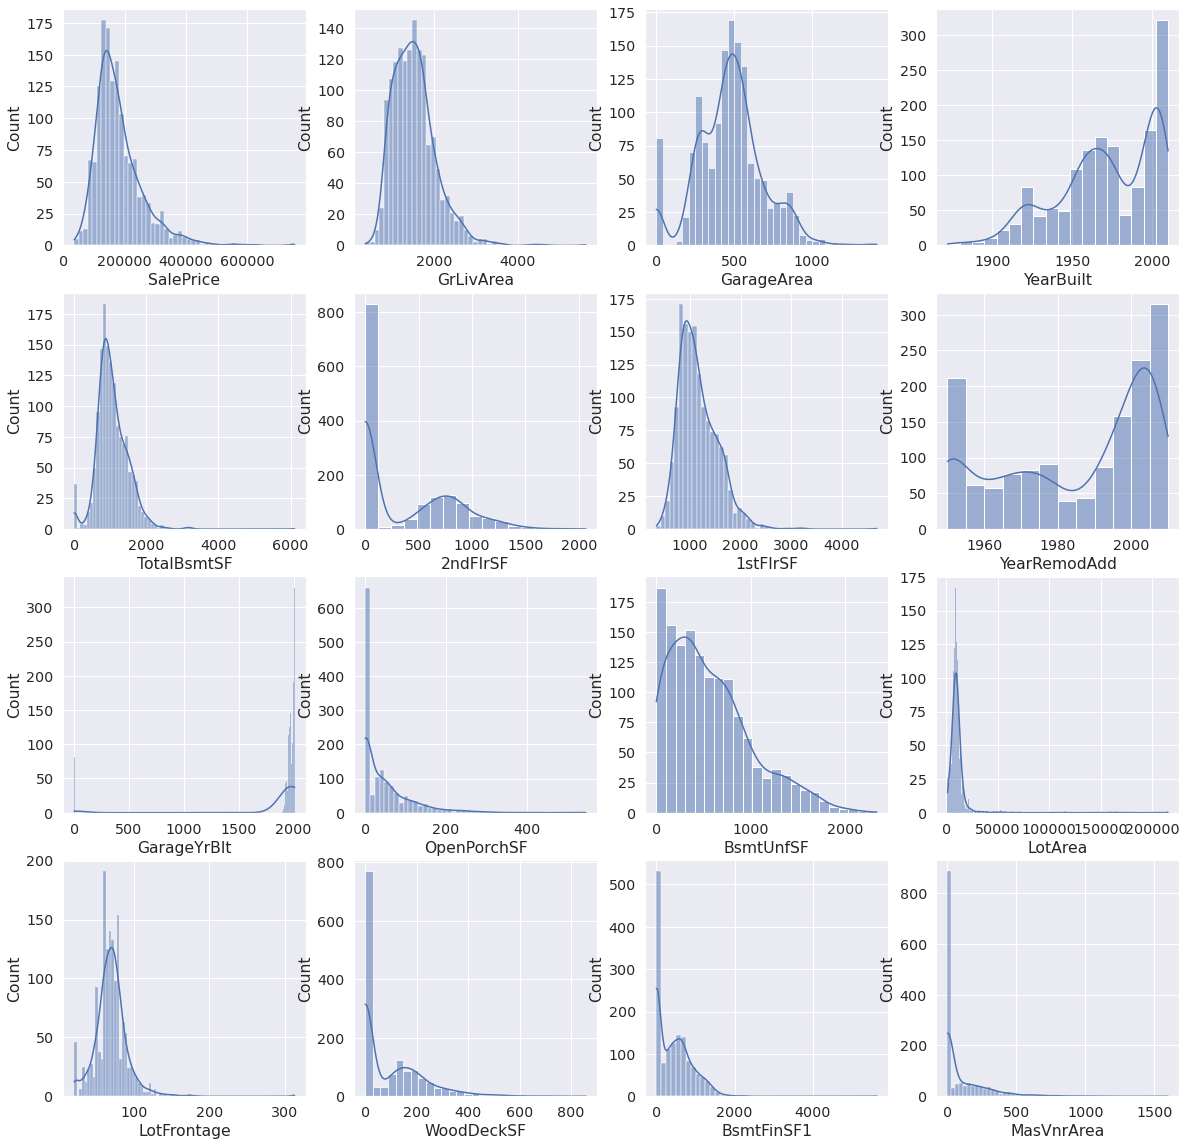

In [29]:
#plotting histograms for continous numeric variables

max_row = 4
max_col = 4

fig, ax = plt.subplots(max_row,max_col,figsize=(20,20))

r = 0
c = 0
for col in sel_num_cont_features:
    sns.histplot(df_train[col],kde=True,ax=ax[r,c])
    c=c+1
    if c >= max_col:
        c = 0
        r = r+1
        if r >= max_row:
            break
            
            
#     sns.histplot(np.log(df_train[col]+1),kde=True,ax=ax[r,c])
#     c=c+1
#     if c >= max_col:
#         c = 0
#         r = r+1
#         if r >= max_row:
#             break       

SalePrice        1.882876
GrLivArea        1.366560
GarageArea       0.179981
YearBuilt       -0.613461
TotalBsmtSF      1.524255
2ndFlrSF         0.813030
1stFlrSF         1.376757
YearRemodAdd    -0.503562
GarageYrBlt     -3.869501
OpenPorchSF      2.364342
BsmtUnfSF        0.920268
LotArea         12.207688
LotFrontage      2.212959
WoodDeckSF       1.541376
BsmtFinSF1       1.685503
MasVnrArea       2.677616
dtype: float64
SalePrice       0.121347
GrLivArea      -0.006140
GarageArea     -3.482604
YearBuilt      -0.641129
TotalBsmtSF    -5.154670
2ndFlrSF        0.289643
1stFlrSF        0.080114
YearRemodAdd   -0.511005
GarageYrBlt    -3.887413
OpenPorchSF    -0.023397
BsmtUnfSF      -2.186504
LotArea        -0.137404
LotFrontage    -0.908933
WoodDeckSF      0.153537
BsmtFinSF1     -0.618410
MasVnrArea      0.503532
dtype: float64


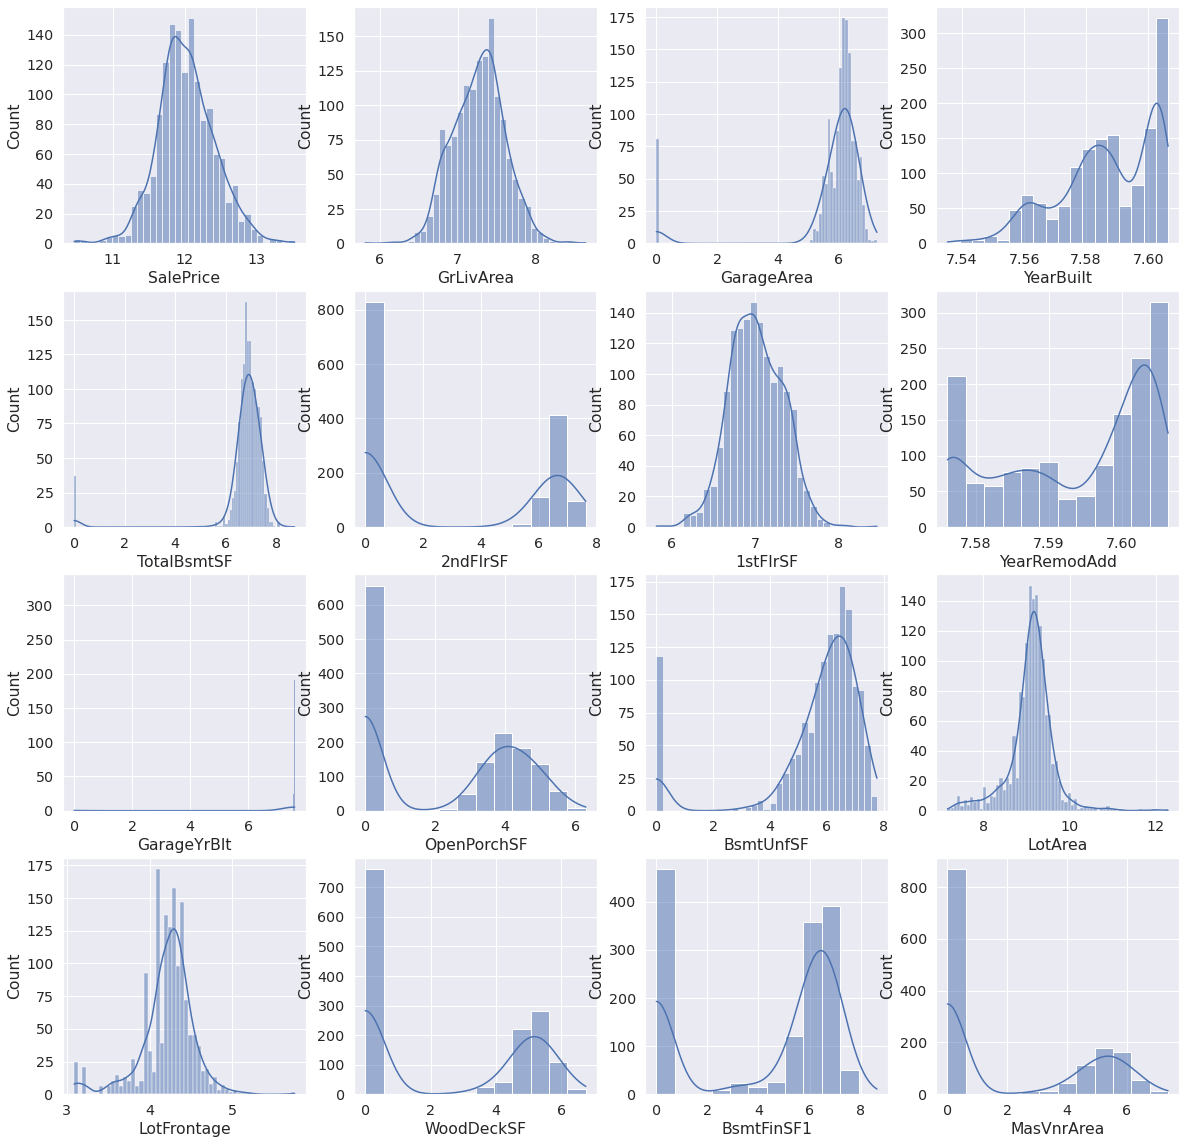

In [30]:
# check the skew of the variables
print(df_train[sel_num_cont_features].skew())

#plotting histograms for log(x+1) of continous numeric variables

max_row = 4
max_col = 4

fig, ax = plt.subplots(max_row,max_col,figsize=(20,20))

r = 0
c = 0
for col in sel_num_cont_features:
    sns.histplot(np.log(df_train[col]+1),kde=True,ax=ax[r,c])
    c=c+1
    if c >= max_col:
        c = 0
        r = r+1
        if r >= max_row:
            break

print(np.log(df_train[sel_num_cont_features]+1).skew())

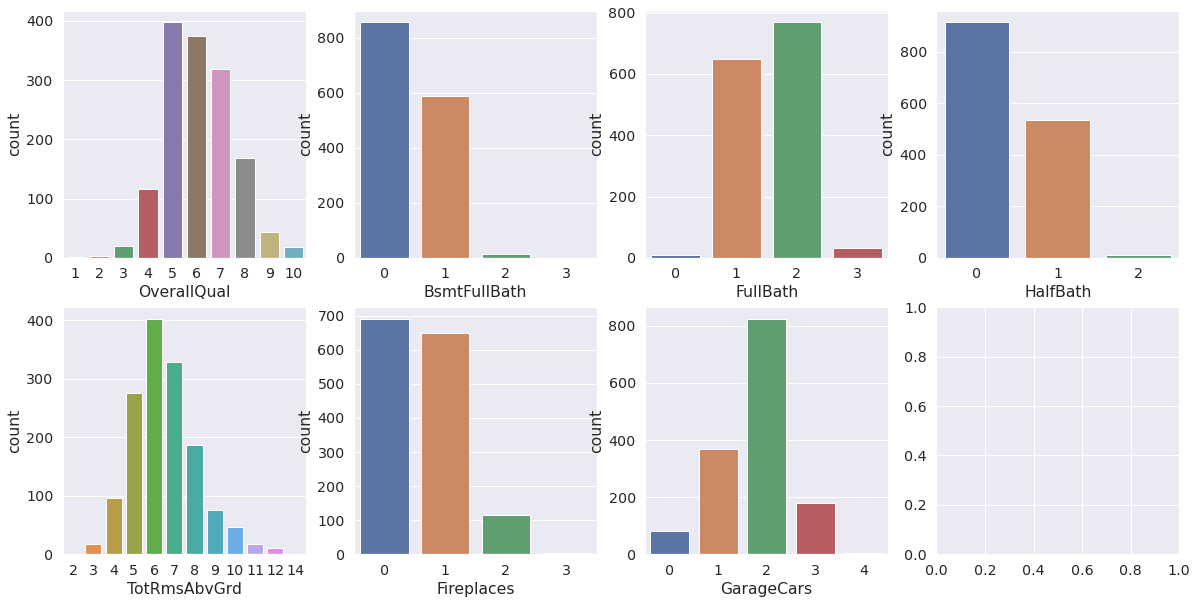

In [31]:
# plotting count-plots for the discrete variables

max_row = 2
max_col = 4

fig, ax = plt.subplots(max_row,max_col,figsize=(20,10))

r = 0
c = 0
for col in sel_num_dis_features:
    sns.countplot(data=df_train,x=col,ax=ax[r,c])
    c=c+1
    if c >= max_col:
        c = 0
        r = r+1
        if r >= max_row:
            break



### Bivariate analysis- Relationship of SalePrice with numeric features 

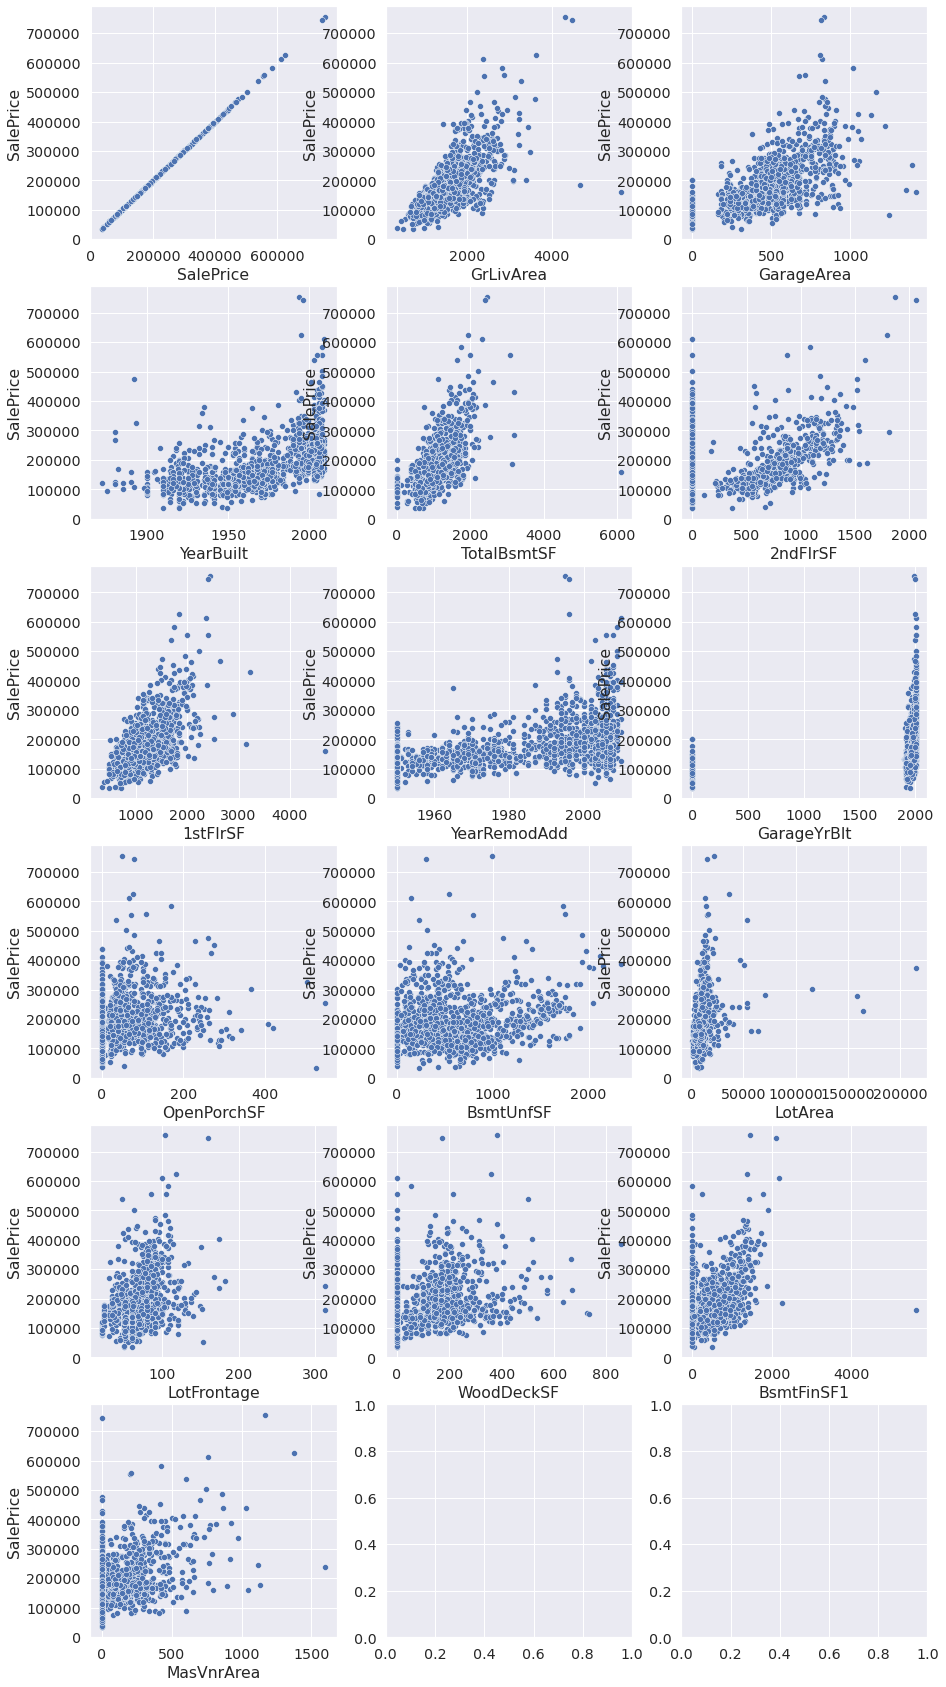

In [32]:
#Scatter plots for the continuous numeric variables

max_row = 6
max_col = 3

fig, ax = plt.subplots(max_row,max_col,figsize=(15,30))

r = 0
c = 0
for col in sel_num_cont_features:
    sns.scatterplot(x=col,y="SalePrice",data=df_train,ax=ax[r,c])
    c=c+1
    if c >= max_col:
        c = 0
        r = r+1
        if r >= max_row:
            break
            

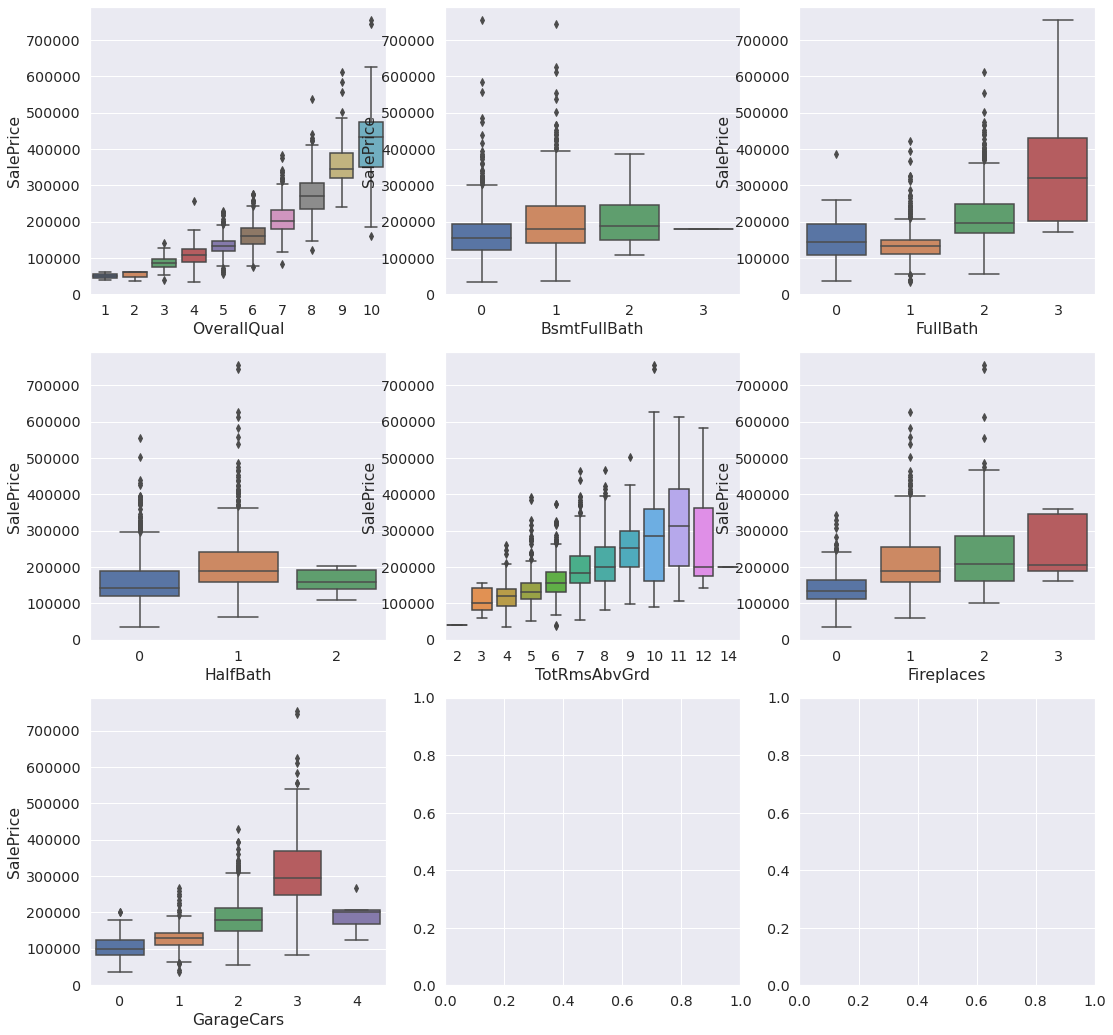

In [33]:
#Boxplots for discrete variables

max_row = 3
max_col = 3

fig, ax = plt.subplots(max_row,max_col,figsize=(18,18))

r = 0
c = 0
for col in sel_num_dis_features:
    sns.boxplot(x=col,y="SalePrice",data=df_train,ax=ax[r,c])
    c=c+1
    if c >= max_col:
        c = 0
        r = r+1
        if r >= max_row:
            break           


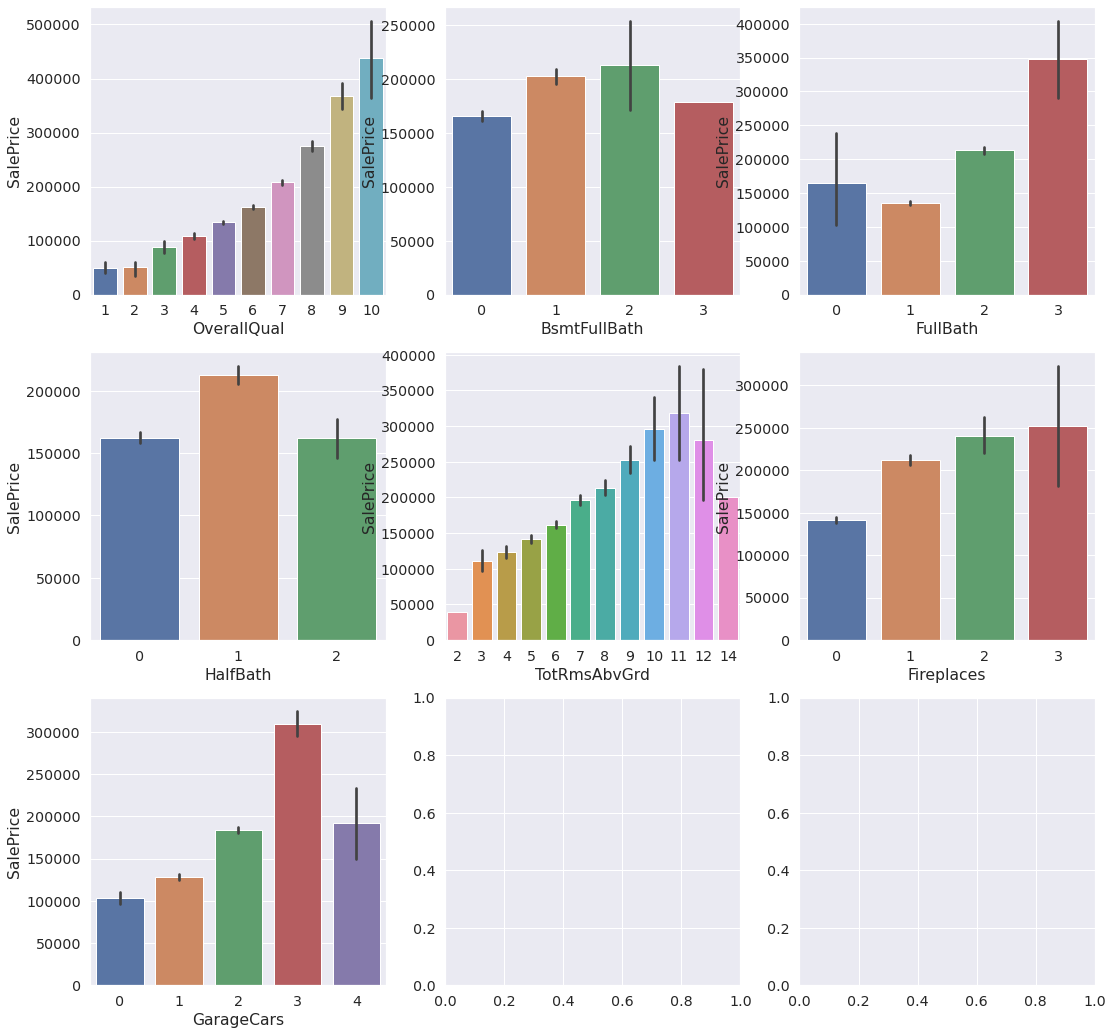

In [34]:
#Barplot for discrete numerical variables

max_row = 3
max_col = 3

fig, ax = plt.subplots(max_row,max_col,figsize=(18,18))

r = 0
c = 0
for col in sel_num_dis_features:
    sns.barplot(x=col,y="SalePrice",data=df_train,ax=ax[r,c])
    c=c+1
    if c >= max_col:
        c = 0
        r = r+1
        if r >= max_row:
            break     

### Remove outliers

In [35]:
print(df_train.shape)

(1460, 76)


In [36]:
df_train = df_train[df_train.OpenPorchSF < 450]
df_train = df_train[df_train.GrLivArea  < 4500]
df_train = df_train[df_train.GarageArea  < 1300]
df_train = df_train[df_train.LotFrontage  < 300]
df_train = df_train[df_train.BsmtFinSF1  < 4000]
df_train = df_train[df_train["1stFlrSF"]  < 4000]
df_train = df_train[df_train.TotalBsmtSF  < 6000]
df_train = df_train[df_train.LotArea  < 150000]

print(df_train.shape)

(1449, 76)


### Analysing the Categorical features 

In [37]:
#List of Categorical features and their values

for x in cat_features:
    print(df_train[x].value_counts())
    print("*"*60)

RL         1143
RM          216
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64
************************************************************
Pave    1444
Grvl       5
Name: Street, dtype: int64
************************************************************
Reg    920
IR1    482
IR2     39
IR3      8
Name: LotShape, dtype: int64
************************************************************
Lvl    1307
Bnk      61
HLS      48
Low      33
Name: LandContour, dtype: int64
************************************************************
AllPub    1448
NoSeWa       1
Name: Utilities, dtype: int64
************************************************************
Inside     1045
Corner      260
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
************************************************************
Gtl    1376
Mod      63
Sev      10
Name: LandSlope, dtype: int64
************************************************************
NAmes      224
CollgCr

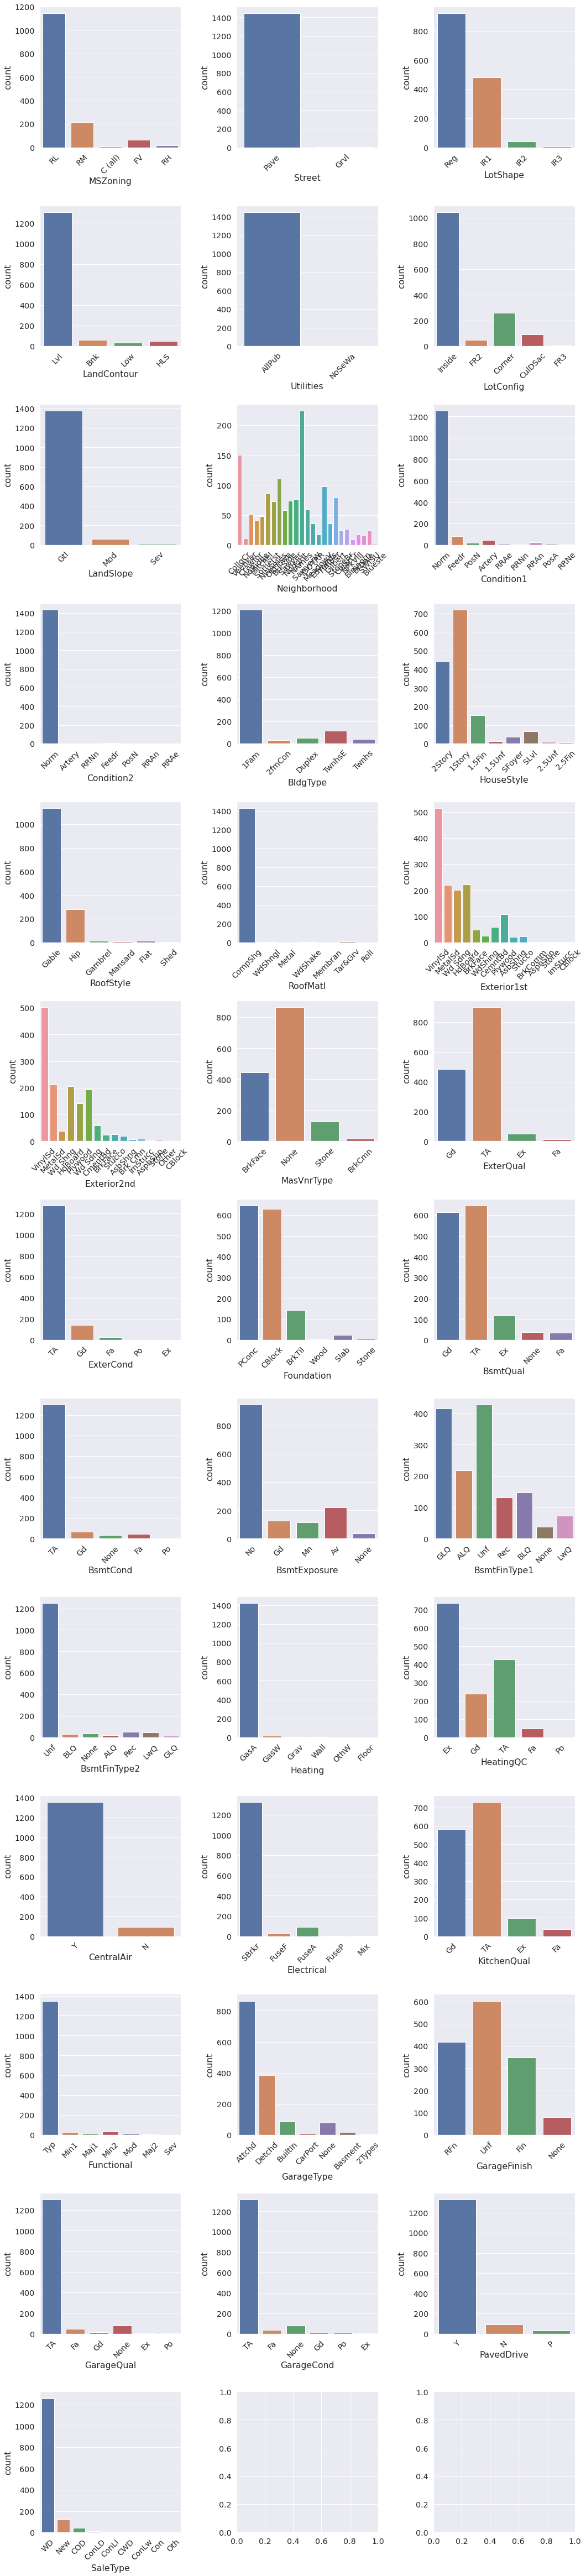

In [38]:
# plotting count-plots for the categorical variables
fig, ax1 = plt.subplots(round(len(cat_features)/3),3,figsize=(15,65))


for i,ax in enumerate(fig.axes):
    if i < len(cat_features)-1:
# To avoid a warning message
        ax.xaxis.set_ticks(ax.get_xticks().tolist())
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(data=df_train,x=cat_features[i],ax=ax)

# To make it compact
plt.tight_layout()


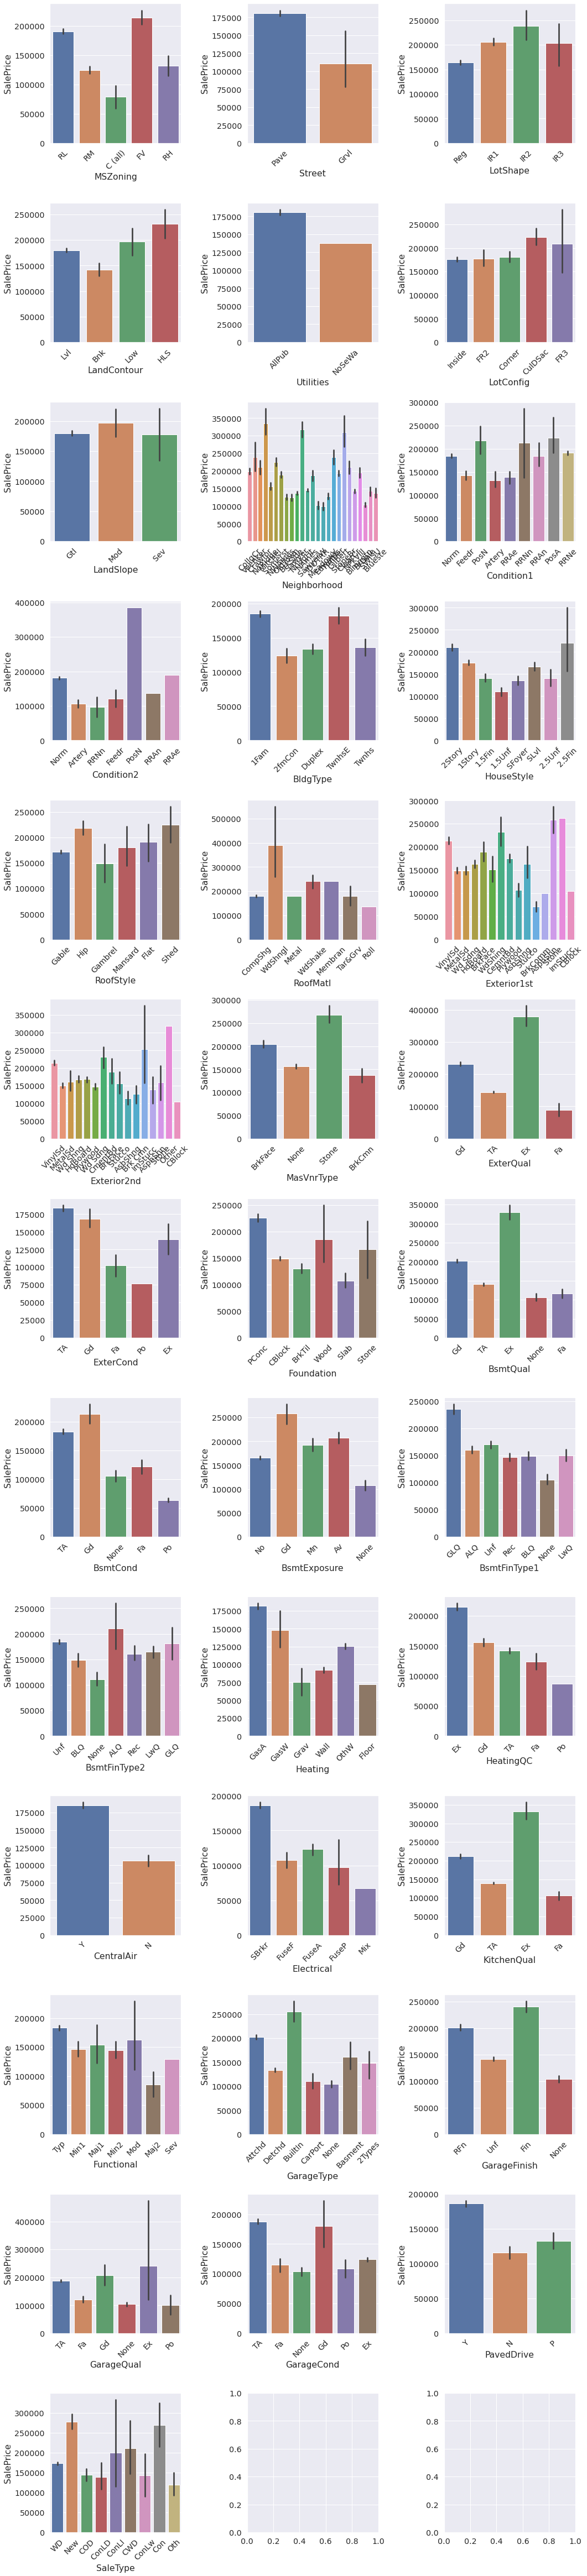

In [39]:
# plotting bar-plots for the categorical variables
fig, ax1 = plt.subplots(round(len(cat_features)/3),3,figsize=(15,65))

for i,ax in enumerate(fig.axes):
    if i < len(cat_features)-1:
# To avoid a warning message
        ax.xaxis.set_ticks(ax.get_xticks().tolist())
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.barplot(data=df_train,x=cat_features[i],y="SalePrice",ax=ax)

# To make it compact
plt.tight_layout()

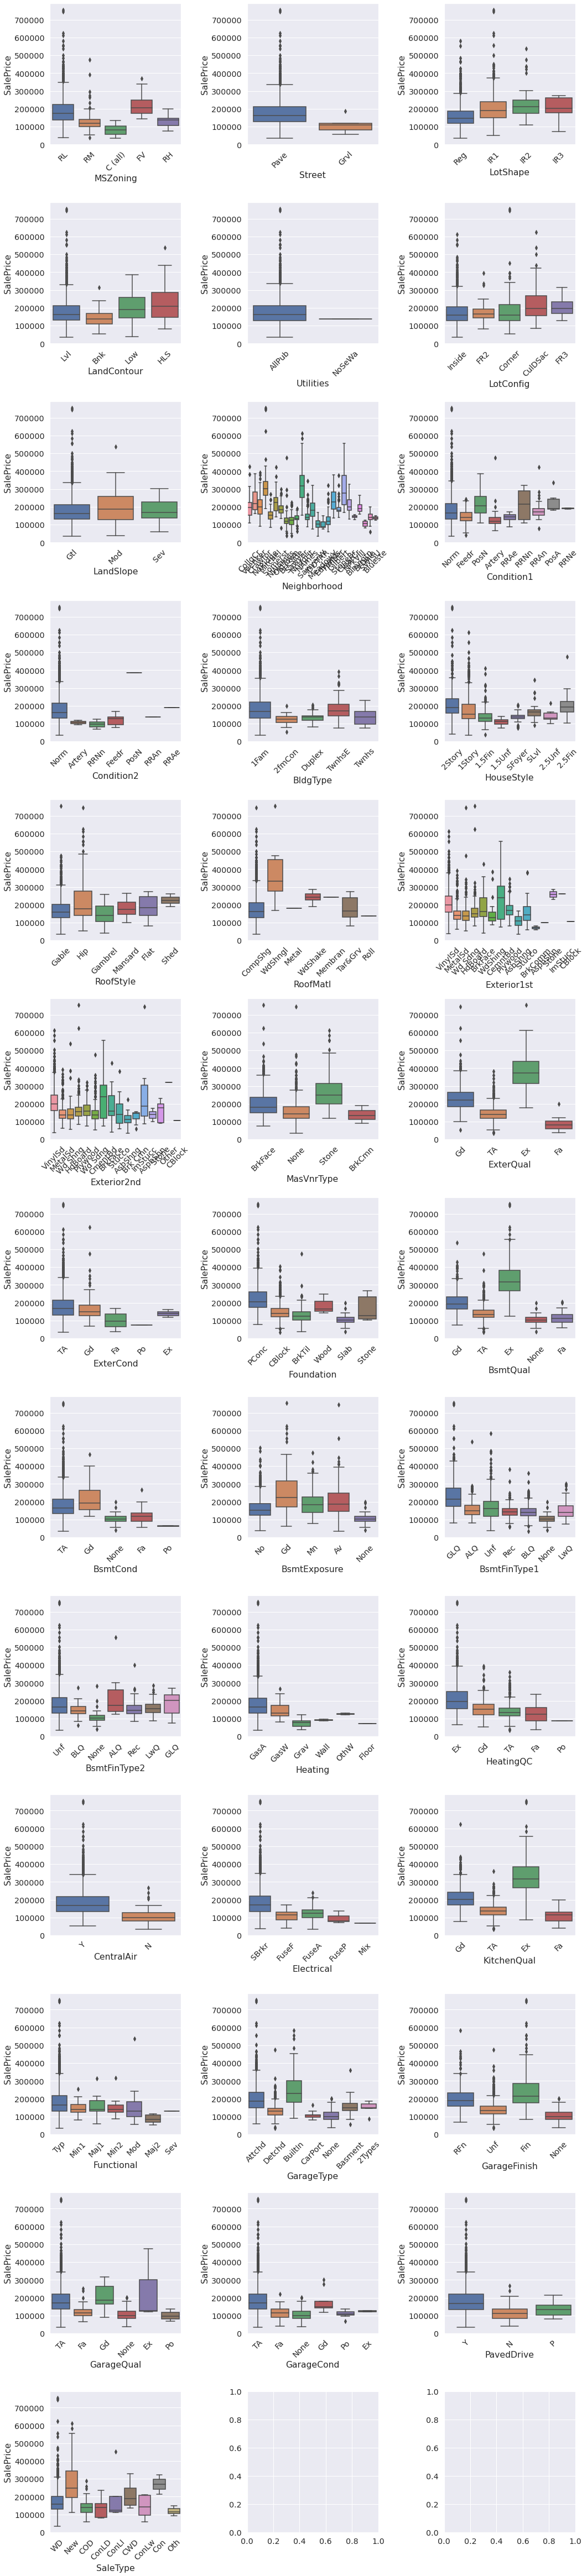

In [40]:
# plotting box-plots for the categorical variables
fig, ax1 = plt.subplots(round(len(cat_features)/3),3,figsize=(15,65))

for i,ax in enumerate(fig.axes):
    if i < len(cat_features)-1:
# To avoid a warning message
        ax.xaxis.set_ticks(ax.get_xticks().tolist())
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data=df_train,x=cat_features[i],y="SalePrice",ax=ax)

# To make it compact
plt.tight_layout()

It is noticed that the categorical features - Street, Utilities and LandSlope does not have a strong relation to the SalePrice. So those can be removed from the list.

In [41]:
# remove the weak correlated categorical columns 
print(cat_features)

cat_features = [x for x in cat_features if x not in ['Street','Utilities','LandSlope']]
print(cat_features)

df_train.drop(['Street','Utilities','LandSlope'],inplace=True,axis='columns')
df_test.drop(['Street','Utilities','LandSlope'],inplace=True,axis='columns')



['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCond

### Log Transformation of right-skewed data

In [42]:
df_train['LotArea'] = np.log(df_train['LotArea'])
df_train['OpenPorchSF'] = np.log(df_train['OpenPorchSF']+1)
df_train['MasVnrArea'] = np.log(df_train['MasVnrArea']+1)
df_train['WoodDeckSF'] = np.log(df_train['WoodDeckSF']+1)
df_train['BsmtUnfSF'] = np.log(df_train['BsmtUnfSF']+1)
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])
df_train['2ndFlrSF'] = np.log(df_train['2ndFlrSF']+1)
df_train['LotFrontage'] = np.log(df_train['LotFrontage'])
df_train['SalePrice'] = np.log(df_train['SalePrice'])


df_test['LotArea'] = np.log(df_test['LotArea'])
df_test['OpenPorchSF'] = np.log(df_test['OpenPorchSF']+1)
df_test['MasVnrArea'] = np.log(df_test['MasVnrArea']+1)
df_test['WoodDeckSF'] = np.log(df_test['WoodDeckSF']+1)
df_test['BsmtUnfSF'] = np.log(df_test['BsmtUnfSF']+1)
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
df_test['1stFlrSF'] = np.log(df_test['1stFlrSF'])
df_test['2ndFlrSF'] = np.log(df_test['2ndFlrSF']+1)
df_test['LotFrontage'] = np.log(df_test['LotFrontage'])


print(df_train[sel_num_cont_features].skew())

SalePrice       0.163991
GrLivArea      -0.066746
GarageArea      0.048637
YearBuilt      -0.615017
TotalBsmtSF     0.511521
2ndFlrSF        0.292744
1stFlrSF        0.007982
YearRemodAdd   -0.505168
GarageYrBlt    -3.880688
OpenPorchSF    -0.027533
BsmtUnfSF      -2.185364
LotArea        -0.630946
LotFrontage    -1.132976
WoodDeckSF      0.152419
BsmtFinSF1      0.769915
MasVnrArea      0.504884
dtype: float64


### Categorical variables to dummies

In [43]:
print(df_train.shape)
print(df_test.shape)

# df_train = pd.get_dummies(df_train)
df_test_id = df_test["Id"]
# df_test = pd.get_dummies(df_test)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded = ohe.fit(df_train[cat_features])

df_train_oh = pd.DataFrame(encoded.transform(df_train[cat_features]))

df_test_oh = pd.DataFrame(encoded.transform(df_test[cat_features]))

df_train_oh.index = df_train.index
df_test_oh.index = df_test.index


(1449, 73)
(1459, 72)


In [44]:
#drop the categorical columns and concat the onehot encoded columns

df_train.drop(cat_features, axis='columns',inplace=True)
df_test.drop(cat_features, axis='columns',inplace=True)

df_train = pd.concat([df_train,df_train_oh], axis='columns')
df_test = pd.concat([df_test,df_test_oh], axis='columns')


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Columns: 272 entries, Id to 233
dtypes: float64(245), int64(27)
memory usage: 3.0 MB


In [46]:
print(df_train.shape)
print(df_test.shape)




(1449, 272)
(1459, 271)


### Modelling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor



y_tmp = df_train["SalePrice"]
x_tmp = df_train.drop("SalePrice",axis='columns')

train_x, test_x, train_y, test_y = train_test_split(x_tmp,y_tmp,test_size=0.2,random_state=2)



In [48]:
#scale the features

stdscaler = StandardScaler()
train_x = stdscaler.fit_transform(train_x)
test_x = stdscaler.transform(test_x)


df_test = stdscaler.fit_transform(df_test)

In [49]:
#Cross validation routine - returns rmse scores for the cv folds

scorer = make_scorer(mean_squared_error,greater_is_better=False)

def cross_val_rmse(model,x,y):
    return(np.sqrt(-cross_val_score(model,x,y,scoring=scorer,cv=10)))



In [50]:
#Linear Regression

model = LinearRegression(normalize = True)
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

0.9517030734556262
Train score: 4.8546510202870426e+26
Test score: 5.1196538427880406e+26


In [51]:
#Lasso Regression

model = Lasso()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

0.0
Train score: 0.3980616186244169
Test score: 0.38664972162643796


In [52]:
#Ridge Regression

model = Ridge()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

0.9516810208646225
Train score: 0.12327462085609009
Test score: 0.20470351843350967


In [53]:
#ElasticNet Regression

model = ElasticNetCV()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

0.9418102518586122
Train score: 0.11035570656316314
Test score: 0.12314211644801856


In [54]:
#SGD Regression

model = SGDRegressor()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

-528591.8400668672
Train score: 78.29803710950921
Test score: 52.92429752991986


In [55]:
#Decsion Tree Regression

model = DecisionTreeRegressor()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

1.0
Train score: 0.19827354980622952
Test score: 0.2280736596173885


In [56]:
#Random Forest Regression

model = RandomForestRegressor()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

0.9842975688918976
Train score: 0.13666306278581491
Test score: 0.15448812913170956


In [57]:
#KNN Regression

model = KNeighborsRegressor()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

0.8385581290405152
Train score: 0.19442909399047195
Test score: 0.21615193533974653


In [58]:
#Gaussian Process Regression

model = GaussianProcessRegressor()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

1.0
Train score: 12.015378911614656
Test score: 12.034211681188987


ElasticNet CV is having the better performance

### Getting the results

In [59]:
#ElasticNet Regression

model = ElasticNetCV()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))

print("Train score:",cross_val_rmse(model,train_x,train_y).mean())
print("Test score:",cross_val_rmse(model,test_x,test_y).mean())

test_pred = model.predict(df_test)

0.9418102518586122
Train score: 0.11035570656316314
Test score: 0.12314211644801856


In [60]:
df_test.shape

(1459, 271)

In [61]:
subm = pd.DataFrame()

subm["Id"] = df_test_id
subm["SalePrice"] = np.exp(test_pred)

subm.head()

subm.to_csv("submission.csv",index=False)